In [6]:
%pip install pandas scikit-learn scipy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

df = pd.read_csv("MH_precrocessed_dataset.csv") 
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Hillside,105 Community Hub,3,h,781500,S,YPA,2017-09-23,18.0,3037,...,2,2,529,139,1970,Brimbank City Council,-37.70161,144.753300,Western Metropolitan,5556
1,Brighton East,2/13 Tatong Rd,3,h,1079325,S,Marshall,2016-05-07,10.7,3187,...,2,2,196,115,2009,Bayside City Council,-37.93020,145.029000,Southern Metropolitan,6938
2,Glen Iris,43 Albion Rd,4,h,1997500,S,Marshall,2018-02-17,7.3,3146,...,2,2,621,139,1945,Boroondara City Council,-37.86544,145.067390,Southern Metropolitan,10412
3,Oak Park,74a Winifred St,3,u,600000,SP,Brad,2016-08-13,11.5,3046,...,1,2,529,139,1970,Moreland City Council,-37.71667,144.913682,Northern Metropolitan,2651
4,Beaumaris,17A Towers St,4,h,1140000,S,Hodges,2017-10-14,17.3,3193,...,2,2,529,171,1995,Bayside City Council,-37.97501,145.052570,Southern Metropolitan,5366


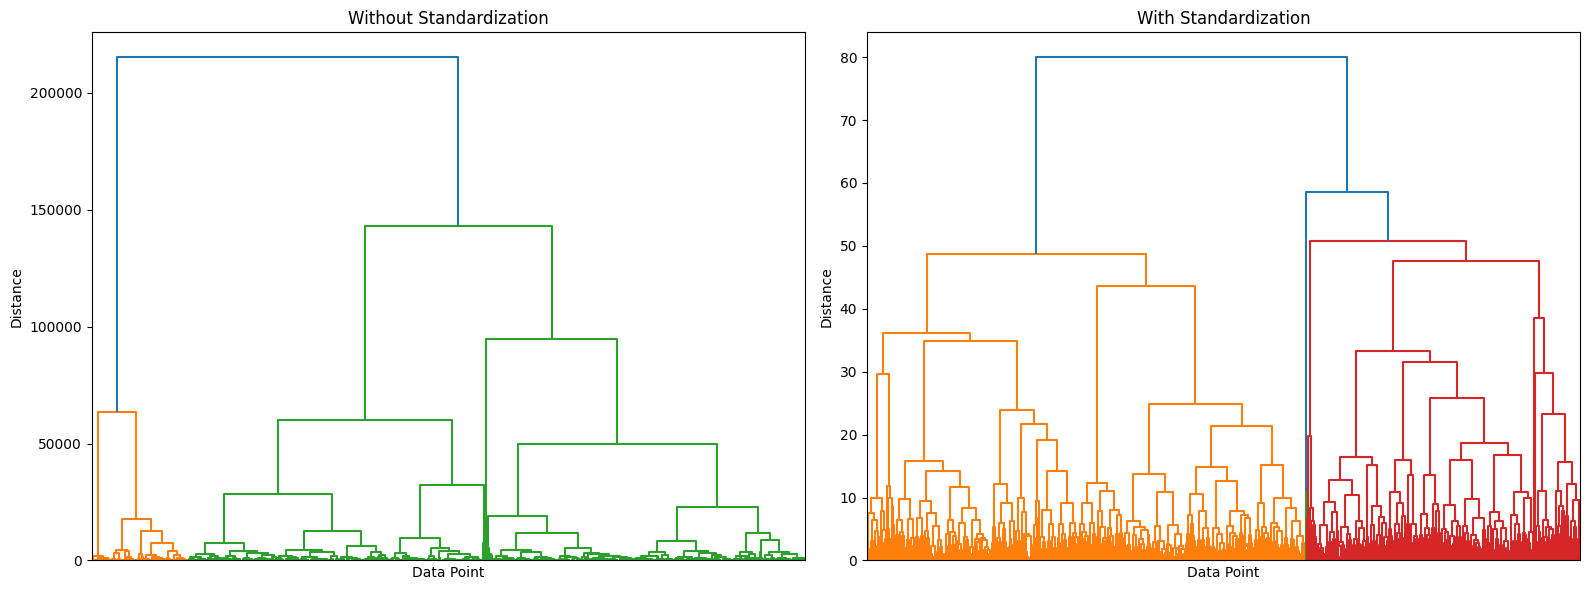

In [18]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

# Select only numerical features (excluding target variable 'Price')
X_numeric = df.drop(columns=["Price"]).select_dtypes(include=['float64', 'int64'])

# 1. Without Standardization
linked_no_scaling = linkage(X_numeric, method='ward')

# 2. With Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)
linked_scaled = linkage(X_scaled, method='ward')

plt.figure(figsize=(16, 6))

# Left: No Standardization
plt.subplot(1, 2, 1)
dendrogram(linked_no_scaling, no_labels=True)
plt.title("Without Standardization")
plt.xlabel("Data Point")
plt.ylabel("Distance")

# Right: With Standardization
plt.subplot(1, 2, 2)
dendrogram(linked_scaled, no_labels=True)
plt.title("With Standardization")
plt.xlabel("Data Point")
plt.ylabel("Distance")

plt.tight_layout()
plt.show()
